In [3]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,precision_score,accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

micro=pd.read_csv('Microsoft_Data.csv')

labels = micro.columns[2:]

micro.drop(columns=['MachineIdentifier',"OsBuildLab"],axis=1,inplace=True)
for col in micro.columns:
    if micro[col].isnull().sum() > 40000:
        micro.drop(col,axis=1,inplace=True)

y=micro['HasDetections']
micro.drop('HasDetections',axis=1,inplace=True)

X = df_train[labels]
y = df_train['target']

micro_dtypes={'object':[col for col in micro.columns if micro[col].dtype =='object'],'int or float':[col for col in micro.columns if micro[col].dtype =='float64']}

for col in micro_dtypes['object']:
    micro[col].fillna(value=micro[col].mode()[0],inplace=True)
    
for col in micro_dtypes['int or float']:
    micro[col].fillna(value=micro[col].mean(),inplace=True)




X_train,X_test,y_train,y_test=train_test_split(micro,y,test_size=0.25,random_state=30)

le=LabelEncoder()
for col in micro_dtypes['object']:
    le.fit(X_train[col])
    X_test[col] = X_test[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
    le.classes_ = np.append(le.classes_, '<unknown>')
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    

MScaling=MinMaxScaler()
for col in micro_dtypes['int or float']:
    X_train[col]=MScaling.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=MScaling.transform(np.array(X_test[col]).reshape(-1,1))

"""SScaling=StandardScaler()
for col in micro_dtypes['int or float']:
    X_train[col]=SScaling.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=SScaling.transform(np.array(X_test[col]).reshape(-1,1))"""

#LogisticRegression model 

log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.predict(X_test)


print(f'confussion matrix =\n {confusion_matrix(y_test,log_reg.predict(X_test))}')


print(f'f1_score = {f1_score(y_test,log_reg.predict(X_test))}')


print(f'precision_score = {precision_score(y_test,log_reg.predict(X_test))}')


print(f'accuracy_score = {accuracy_score (y_test,log_reg.predict(X_test))}')

y_pre_pro=log_reg.predict_proba(X_test)[::,1]

fpr,tpr,threshold=roc_curve(y_test,y_pre_pro)
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc_auc_score')
micro


NameError: name 'df_train' is not defined

In [19]:
micro.shape

(56528, 0)

In [13]:
#decision model

from sklearn.tree import DecisionTreeClassifier

Decision_class=DecisionTreeClassifier(min_samples_split= 9,min_samples_leaf = 10,max_leaf_nodes= 8,max_depth=8,criterion='entropy')
Decision_class.fit(X_train,y_train)
Decision_class.predict(X_test)



print(f'confussion matrix =\n {confusion_matrix(y_test,Decision_class.predict(X_test))}')


print(f'Decision_class.score= {Decision_class.score(X_train,y_train)}')


print(f'f1_score = {f1_score(y_test,Decision_class.predict(X_test))}')


print(f'precision_score = {precision_score(y_test,Decision_class.predict(X_test))}')


print(f'accuracy_score = {accuracy_score (y_test,Decision_class.predict(X_test))}')


NameError: name 'X_train' is not defined

In [82]:
from sklearn.model_selection import RandomizedSearchCV

#parameters tuning for DecisionTreeClassifier

Param_dict_RSC = {
'max_depth':[4,5,6,7,8,9,10],
'min_samples_split':[2,3,4,5,6,7,8,9,10],
'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
'max_leaf_nodes':[4,5,6,7,8,9,10],
"criterion": ["gini", "entropy"]}

rcv=RandomizedSearchCV(Decision_class,Param_dict_RSC,cv=5,n_iter=15)
rcv.fit(X_train,y_train)
rcv.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 9,
 'max_leaf_nodes': 8,
 'max_depth': 8,
 'criterion': 'gini'}

In [13]:
from sklearn.ensemble import RandomForestClassifier

RandomForest=RandomForestClassifier()

RandomForest.fit(X_train,y_train)
RandomForest.predict(X_test)


print(f'confussion matrix =\n {confusion_matrix(y_test,RandomForest.predict(X_test))}')
print(f'RandomForest.score= {RandomForest.score(X_train,y_train)}')
print(f'f1_score = {f1_score(y_test,RandomForest.predict(X_test))}')
print(f'precision_score = {precision_score(y_test,RandomForest.predict(X_test))}')

confussion matrix =
 [[1666  807]
 [1289 1238]]
RandomForest.score= 0.9838655910394026
f1_score = 0.5415573053368328
precision_score = 0.6053789731051344


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#parameters tuning for RandomForestClassifier

Param_dict_RSC = {
'max_depth':[4,5,6,7,8,9,10],
'min_samples_split':[2,3,4,5,6,7,8,9,10],
'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
'max_leaf_nodes':[4,5,6,7,8,9,10],
"criterion": ["gini", "entropy"]}

rcv=RandomizedSearchCV(Decision_class,Param_dict_RSC,cv=5,n_iter=15)
rcv.fit(X_train,y_train)
rcv.best_params_

confussion matrix =
 [[1791 2508]
 [1499 2814]]
f1_score = 0.5841203943954333
precision_score = 0.5287485907553551
accuracy_score = 0.5347189967487227


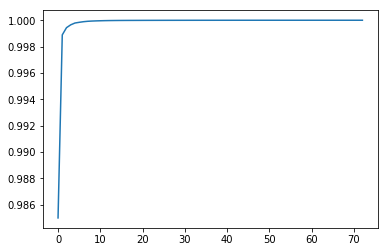

In [10]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))


X_train_df=pd.DataFrame(pca.fit_transform(X_train),columns=[X_train.columns])
X_train_df.drop(X_train_df.iloc[:,-65:],axis=1,inplace=True)
X_test_df=pd.DataFrame(pca.transform(X_test),columns=[X_test.columns])
X_test_df.drop(X_test_df.iloc[:,-65:],axis=1,inplace=True)


log_pca=LogisticRegression()
log_pca.fit(X_train_df,y_train)
log_pca.predict(X_test_df)

confussion_pca=confusion_matrix(y_test,log_pca.predict(X_test_df))
print(f'confussion matrix =\n {confussion_pca}')

f1_pca=f1_score(y_test,log_pca.predict(X_test_df))
print(f'f1_score = {f1_pca}')

precision_pca=precision_score(y_test,log_pca.predict(X_test_df))
print(f'precision_score = {precision_pca}')

accuracy_pca=accuracy_score (y_test,log_pca.predict(X_test_df))
print(f'accuracy_score = {accuracy_pca}')


In [11]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

gaussian=GaussianNB()
gaussian.fit(X_train_df,y_train)
gaussian.predict(X_test_df)

confussion_pca=confusion_matrix(y_test,gaussian.predict(X_test_df))
print(f'confussion matrix =\n {confussion_pca}')

f1_gnb=f1_score(y_test,gaussian.predict(X_test_df))
print(f'f1_score = {f1_gnb}')

precision_gnb=precision_score(y_test,gaussian.predict(X_test_df))
print(f'precision_score = {precision_gnb}')

accuracy_gbn=accuracy_score (y_test,gaussian.predict(X_test_df))
print(f'accuracy_score = {accuracy_gbn}')

confussion matrix =
 [[1385 2914]
 [1104 3209]]
f1_score = 0.6149865848984285
precision_score = 0.5240894986117917
accuracy_score = 0.5334417092429169


In [67]:
list111=range(32)
list111

range(0, 32)